In [81]:
#1.importing libraries
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)
#path for data, loading in memory
os.chdir('C:/Users/mua377n/Downloads/archive/')
file = 'Loan_status_2007-2020Q3.gzip'

In [58]:
#2.loading data into a data frame
loan = pd.read_csv(file, sep = ',', quotechar = '"', low_memory = False)

In [60]:
print(loan.shape) #rows 2,925,493, 3 mil rows. 142 columns

(2925493, 142)


In [61]:
loan.head(2)

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [62]:
loan.tail(2)

,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
2925491,105449,102196576,6000.0,6000.0,6000.0,36 months,11.44%,197.69,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2925492,105450,99799684,30000.0,30000.0,30000.0,60 months,25.49%,889.18,E,E4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [94]:
#3. checking data types and describing the data
loan.info() #dtypes include float64, int64, and object / char
print(loan.dtypes)
print(loan.describe())
#columns with numeric data type
loan_num = loan.select_dtypes(include = ['int64', 'float64']).columns
#columns with categorical data type
loan_char = loan.select_dtypes(exclude = ['int64', 'float64']).columns

Unnamed: 0                                      int64
id                                             object
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
                                               ...   
hardship_loan_status                           object
orig_projected_additional_accrued_interest    float64
hardship_payoff_balance_amount                float64
hardship_last_payment_amount                  float64
debt_settlement_flag                           object
Length: 142, dtype: object
         Unnamed: 0     loan_amnt   funded_amnt  funded_amnt_inv  \
count  2.925493e+06  2.925492e+06  2.925492e+06     2.925492e+06   
mean   8.697419e+04  1.535878e+04  1.535470e+04     1.534005e+04   
std    8.048842e+04  9.478383e+03  9.477145e+03     9.480634e+03   
min    0.000000e+00  5.000000e+02  5.000000e+02     0.000000e+00   
25%    3.284100e+04  8.000000e+03  8.00

In [86]:
#4. error handling, duplicates
#print("finding duplicate rows: ", loan[loan.duplicated()].shape[0])
#print("shape before removing duplicates: ", loan.shape)
#loan = loan.drop_duplicates()
#print("shape after removing duplicates ", loan.shape)

In [66]:
#5. missing values 
#finding missing or null values
print("Finding missing or null values: ")
print(loan.isnull().sum())
#missing value imputation, last value, median, mode for categorical var, average, interpolate


Finding missing or null values: 
Unnamed: 0                                          0
id                                                  0
loan_amnt                                           1
funded_amnt                                         1
funded_amnt_inv                                     1
                                               ...   
hardship_loan_status                          2782082
orig_projected_additional_accrued_interest    2746253
hardship_payoff_balance_amount                2743417
hardship_last_payment_amount                  2743417
debt_settlement_flag                                1
Length: 142, dtype: int64


In [116]:
#6.keeping relevant rows and columns
keep_loan_status = ['loan_status','Charged Off', 'Fully Paid', 'Late (16-30 days)', 
             'Late (31-120 days)', 'Default']
loan = loan[loan['loan_status'].isin(keep_loan_status)]
#based on variable description. keep variables that might be related to prediction of loan status
keep_vars = ['id','loan_status', 'loan_amnt','int_rate','emp_length']#, 'mort_acc', 
  #         'mths_since_recent_bc', 'mths_since_recent_inq',
   #        'total_il_high_credit_limit']
loan = loan.filter(keep_vars, axis = 1)

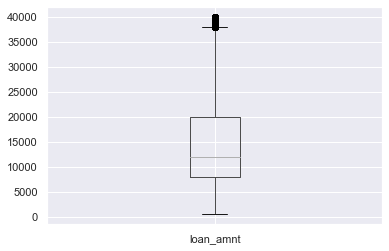

In [117]:
#7. outliers, box plots
loan.boxplot(column = 'loan_amnt')
loan['loan_amnt'].describe()

def remove_outl(colm):
    sorted(colm)
    q1, q3 = colm.quantile([0.25, 0.75])
    IQR = q3-q1
    lwr_rng = q1 - 1.5*IQR
    upr_rng = q3 + 1.5*IQR
    return lwr_rng, upr_rng

lwr, upr = remove_outl(loan1['loan_amnt'])
loan['loan_amnt'] = np.where(loan['loan_amnt']>upr, upr, loan['loan_amnt'])
loan['loan_amnt'] = np.where(loan['loan_amnt']<lwr, lwr, loan['loan_amnt'])

,loan_amnt
count,1.879637e+06
mean,1.459312e+04
std,8.927262e+03
min,5.000000e+02
25%,8.000000e+03
50%,1.200000e+04
75%,2.000000e+04
max,3.800000e+04


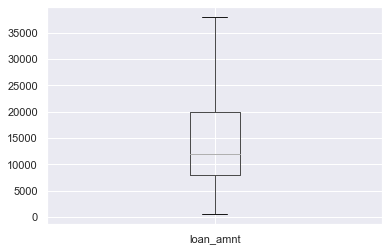

In [118]:
loan.boxplot(column = 'loan_amnt')
loan.describe()

In [ ]:
#8.feature engineering - creating features from raw data to increase predictive power

In [119]:
#9. patterns in data - correlation matrix
c = loan.corr()

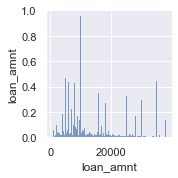

In [120]:
#correlogram 
# with regression
sns.pairplot(loan, kind="reg")
plt.show()
# without regression
#sns.pairplot(loan, kind="scatter")
#plt.show()

In [ ]:
#heatmap
#normalize
loan_norm_col=(loan-loan.mean())/loan.std()
sns.heatmap(loan_norm_col, cmap='viridis')
plt.show()
#dendograms